## Developing Machine Learning based Tumor Prediction Model by comparing LogisticRegression, RandomForest, Decision Trees, KNN, GaussianNB, SVM and XGBoost

# Feature Selection:

In [1]:
# Univariate Selection
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df = pd.read_csv("Input.csv")
X = df.iloc[:,2:19]  #select all the feature columns
y = df.iloc[:,-1]    #select the target


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


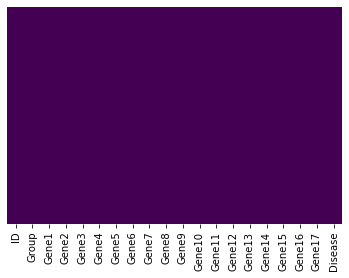

In [3]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

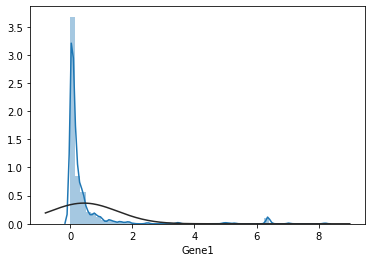

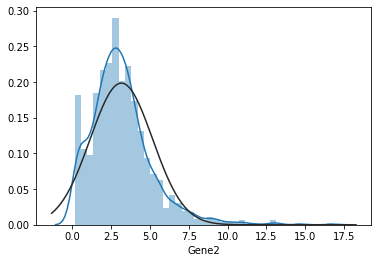

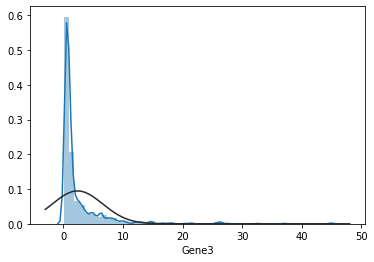

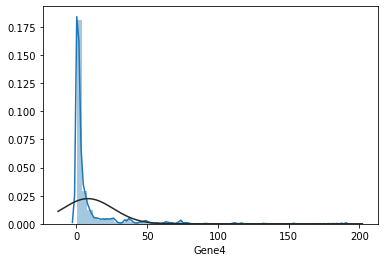

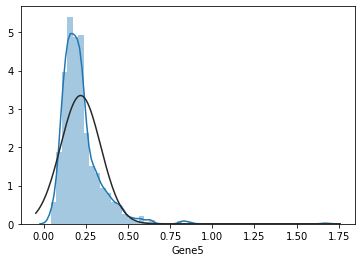

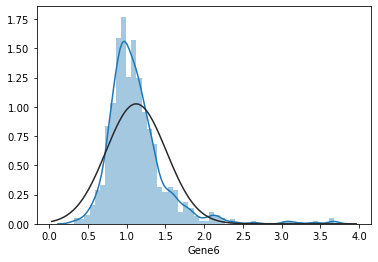

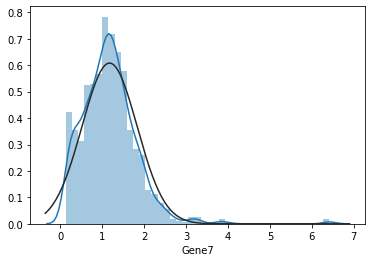

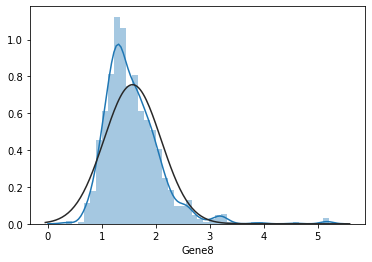

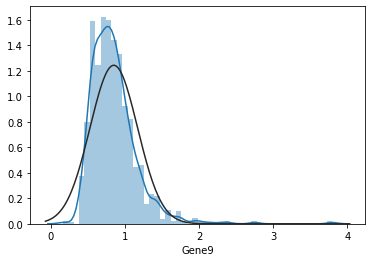

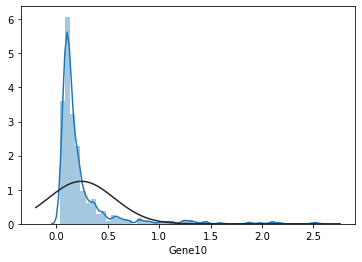

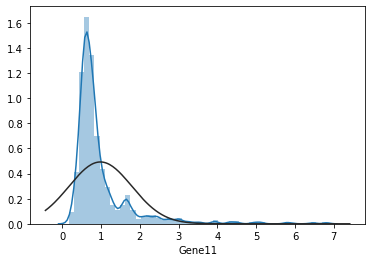

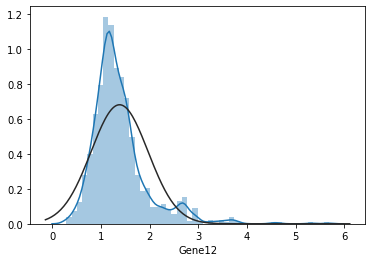

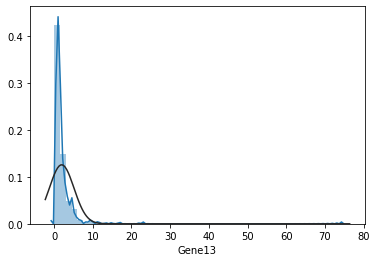

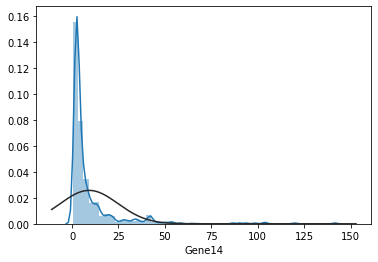

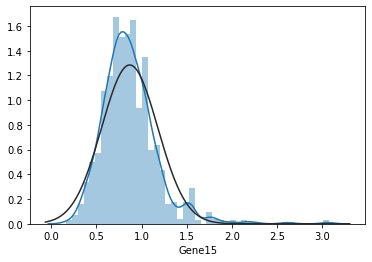

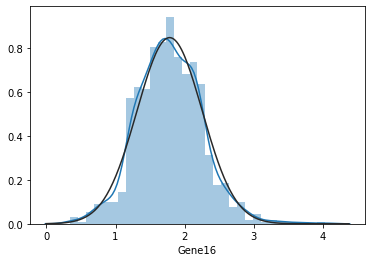

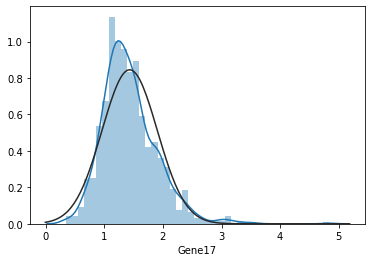

<Figure size 432x288 with 0 Axes>

In [4]:
features = X.columns
for i in features:
    sns.distplot(X[i], fit=norm);
    fig = plt.figure()
#     res = stats.probplot(X[i], plot=plt)

In [5]:
#skewness and kurtosis

features = X.columns
for i in features:
    print(i + " "+ "Skewness: %f" % X[i].skew())
    print(i +" "+ "Kurtosis: %f" % X[i].kurt())

Gene1 Skewness: 4.737284
Gene1 Kurtosis: 23.269778
Gene2 Skewness: 1.547123
Gene2 Kurtosis: 5.067577
Gene3 Skewness: 4.828881
Gene3 Kurtosis: 32.158157
Gene4 Skewness: 4.147722
Gene4 Kurtosis: 23.011427
Gene5 Skewness: 3.091567
Gene5 Kurtosis: 23.035489
Gene6 Skewness: 2.476980
Gene6 Kurtosis: 11.065075
Gene7 Skewness: 1.852084
Gene7 Kurtosis: 10.784811
Gene8 Skewness: 1.999136
Gene8 Kurtosis: 8.823144
Gene9 Skewness: 2.633185
Gene9 Kurtosis: 15.718306
Gene10 Skewness: 3.833846
Gene10 Kurtosis: 17.393458
Gene11 Skewness: 3.457183
Gene11 Kurtosis: 15.497034
Gene12 Skewness: 2.036245
Gene12 Kurtosis: 7.356916
Gene13 Skewness: 12.115246
Gene13 Kurtosis: 241.635807
Gene14 Skewness: 4.291359
Gene14 Kurtosis: 23.567297
Gene15 Skewness: 1.644381
Gene15 Kurtosis: 6.897943
Gene16 Skewness: 0.292020
Gene16 Kurtosis: 0.984491
Gene17 Skewness: 1.135713
Gene17 Kurtosis: 3.554255


In [6]:
#applying log transformation

features = X.columns
for i in features:
    X[i] = np.log(X[i])

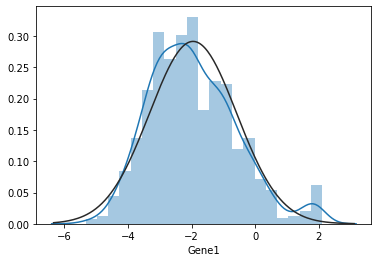

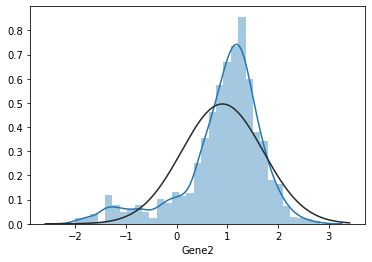

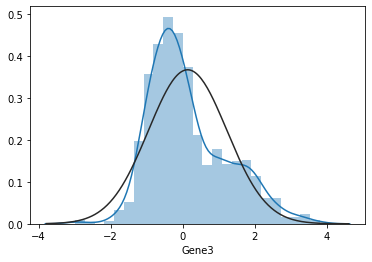

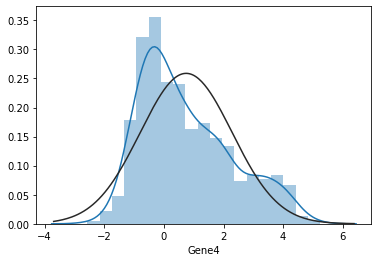

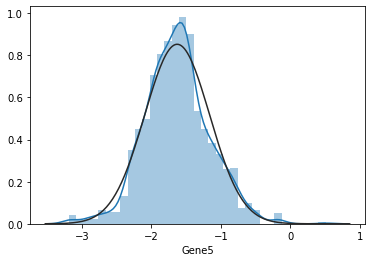

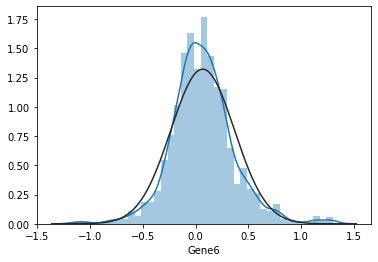

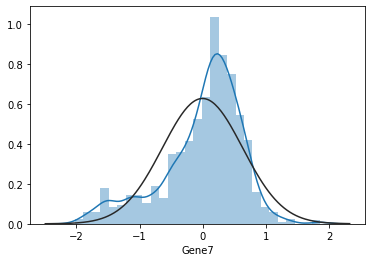

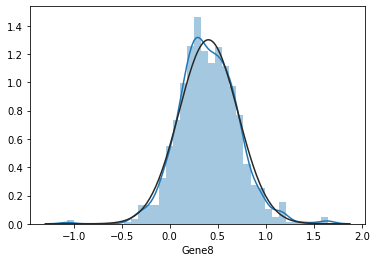

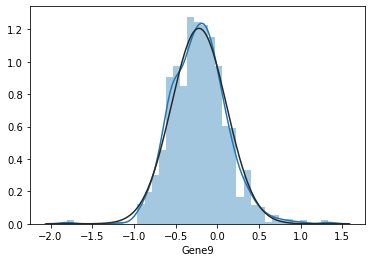

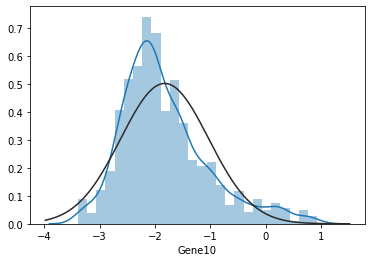

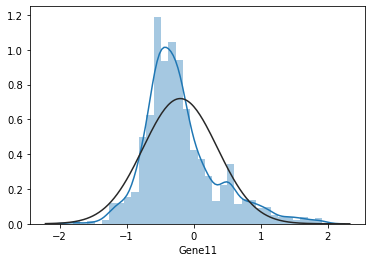

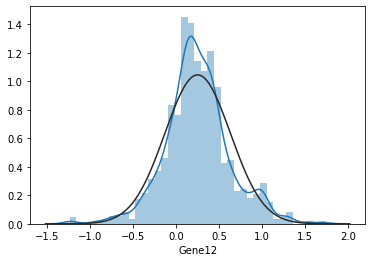

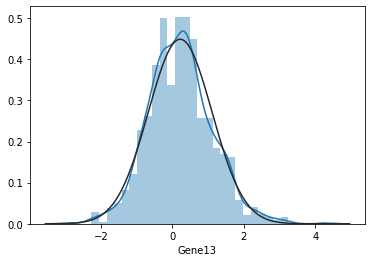

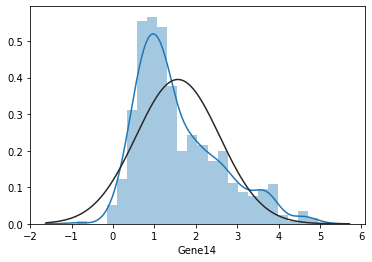

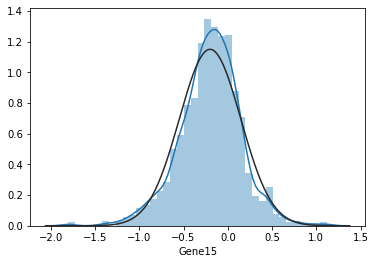

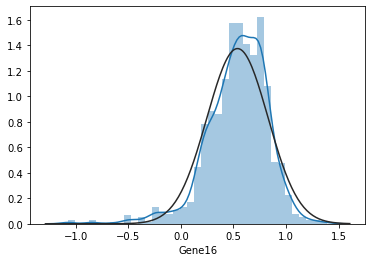

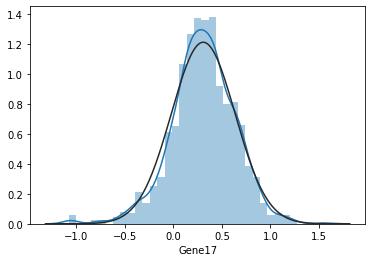

<Figure size 432x288 with 0 Axes>

In [7]:
features = X.columns
for i in features:
    sns.distplot(X[i], fit=norm);
    fig = plt.figure()

In [8]:
#skewness and kurtosis

features = X.columns
for i in features:
    print(i + " "+ "Skewness: %f" % X[i].skew())
    print(i +" "+ "Kurtosis: %f" % X[i].kurt())

Gene1 Skewness: 0.557137
Gene1 Kurtosis: 0.235075
Gene2 Skewness: -1.245234
Gene2 Kurtosis: 1.795820
Gene3 Skewness: 0.753999
Gene3 Kurtosis: 0.222707
Gene4 Skewness: 0.681469
Gene4 Kurtosis: -0.354364
Gene5 Skewness: 0.124153
Gene5 Kurtosis: 0.839669
Gene6 Skewness: 0.390682
Gene6 Kurtosis: 2.262017
Gene7 Skewness: -0.883920
Gene7 Kurtosis: 0.697931
Gene8 Skewness: 0.183680
Gene8 Kurtosis: 1.493759
Gene9 Skewness: 0.287450
Gene9 Kurtosis: 1.640425
Gene10 Skewness: 0.997879
Gene10 Kurtosis: 1.056080
Gene11 Skewness: 1.030467
Gene11 Kurtosis: 1.512353
Gene12 Skewness: 0.102608
Gene12 Kurtosis: 1.383452
Gene13 Skewness: 0.273849
Gene13 Kurtosis: 0.653797
Gene14 Skewness: 0.935953
Gene14 Kurtosis: 0.348021
Gene15 Skewness: -0.280246
Gene15 Kurtosis: 1.472390
Gene16 Skewness: -1.044874
Gene16 Kurtosis: 3.102817
Gene17 Skewness: -0.349356
Gene17 Kurtosis: 1.302648


In [9]:
# Fitting a baseline Logistic regression Model
lr = LogisticRegression()      
lr_model = lr.fit(X,y)

rfecv = RFECV(estimator=lr, scoring='accuracy')
rfecv = rfecv.fit(X,y)



In [10]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 17
Best features : Index(['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5', 'Gene6', 'Gene7', 'Gene8',
       'Gene9', 'Gene10', 'Gene11', 'Gene12', 'Gene13', 'Gene14', 'Gene15',
       'Gene16', 'Gene17'],
      dtype='object')


In [11]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X, y)
print("Score: ", logistic.score(X, y))

Score:  0.811453744493392


In [12]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
print(model.feature_importances_)

[0.11327952 0.03907609 0.0742179  0.05785454 0.05227544 0.03080677
 0.14124829 0.05021469 0.03524158 0.04022523 0.03430169 0.04788158
 0.05541177 0.07769867 0.07988356 0.0285655  0.04181716]


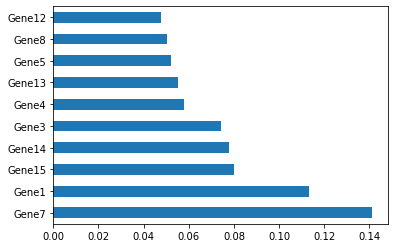

In [14]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [15]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X,y)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [16]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-0.1894681423513651


In [17]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,2,3,4,5,10,15,20]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-0.18946814235136689


In [18]:

prediction_lasso=lasso_regressor.predict(X)
prediction_ridge=ridge_regressor.predict(X)

In [19]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.10121125 0.04931987 0.07532912 0.05283749 0.04289747 0.03913732
 0.092527   0.04690265 0.04689396 0.07626644 0.04926332 0.07139227
 0.05791241 0.04920115 0.06973031 0.0339641  0.04521386]


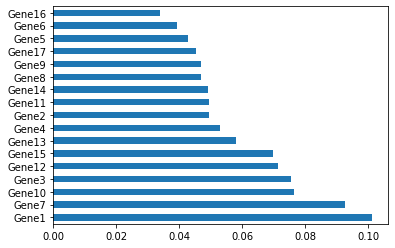

In [21]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [22]:
feat_importances.nlargest(10)

Gene1     0.101211
Gene7     0.092527
Gene10    0.076266
Gene3     0.075329
Gene12    0.071392
Gene15    0.069730
Gene13    0.057912
Gene4     0.052837
Gene2     0.049320
Gene11    0.049263
dtype: float64

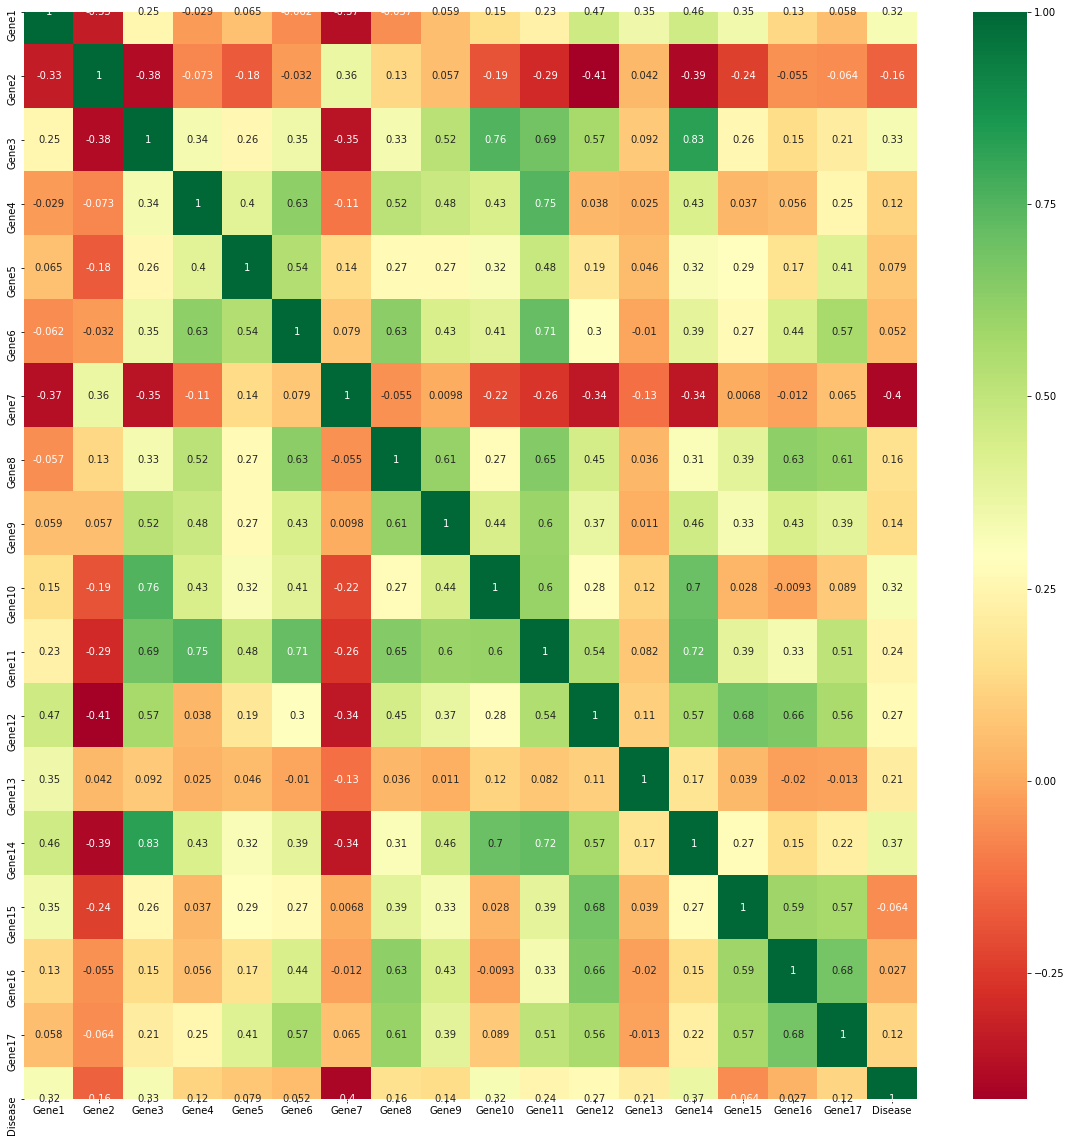

In [23]:

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

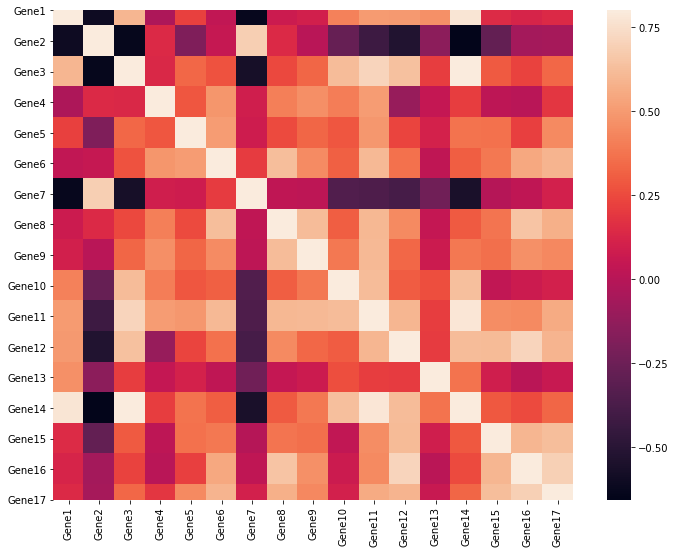

In [24]:
#correlation matrix
corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [26]:
clf_lr = LogisticRegression()      
lr_baseline_model = clf_lr.fit(X,y)

rfecv = RFECV(estimator=clf_lr, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X,y)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])


Optimal number of features : 16
Best features : Index(['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5', 'Gene6', 'Gene7', 'Gene8',
       'Gene9', 'Gene10', 'Gene11', 'Gene12', 'Gene13', 'Gene15', 'Gene16',
       'Gene17'],
      dtype='object')


In [27]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 16
Best features : Index(['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5', 'Gene6', 'Gene7', 'Gene8',
       'Gene9', 'Gene10', 'Gene11', 'Gene12', 'Gene13', 'Gene15', 'Gene16',
       'Gene17'],
      dtype='object')


In [28]:
rfecv.grid_scores_

array([0.64134602, 0.6961393 , 0.74285531, 0.72251309, 0.71633776,
       0.74467953, 0.73673442, 0.74555292, 0.75253938, 0.76930693,
       0.7648588 , 0.76748258, 0.77188797, 0.76842964, 0.77279231,
       0.77368503, 0.77368503])

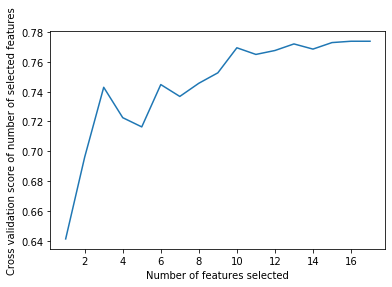

In [29]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [30]:
def generate_accuracy_and_heatmap(model, X, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(X))
    f_score = f1_score(y,model.predict(X))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
#    
    return 1

In [31]:
x_train_rfecv = rfecv.transform(X)

lr_rfecv_model = clf_lr.fit(x_train_rfecv, y)
generate_accuracy_and_heatmap(lr_rfecv_model, x_train_rfecv, y)

Accuracy is:  0.8193832599118943
F1 score is:  0.7651775486827035




1

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns # used for plot interactive graph. I like it most for plot
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

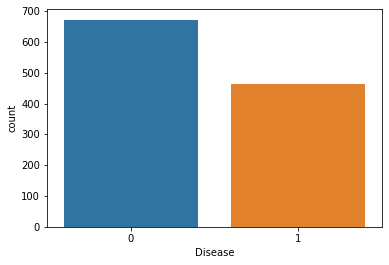

In [33]:
# plotting the diagonisis result 
sns.countplot(df['Disease'],label="Count")

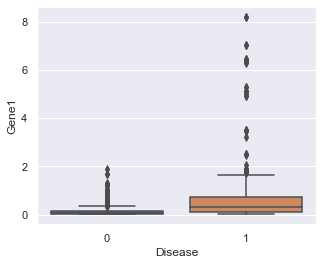

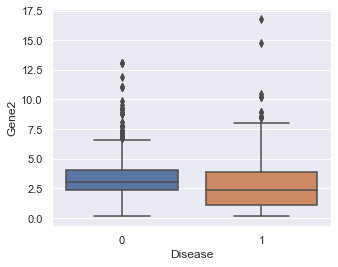

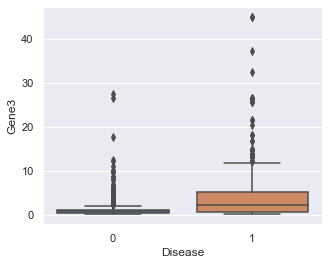

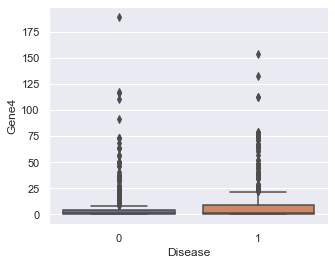

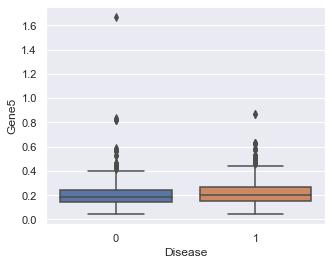

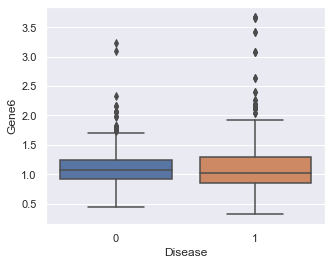

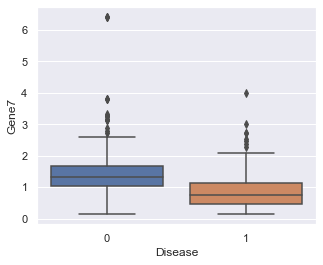

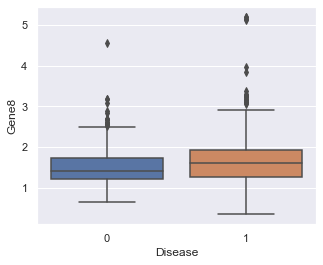

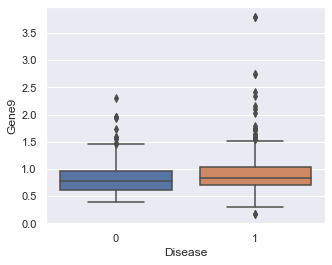

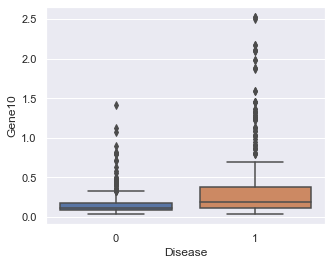

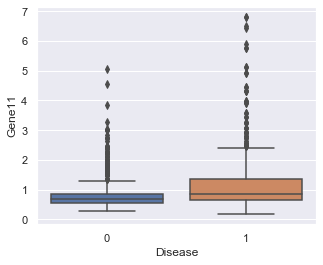

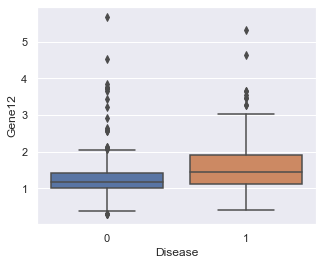

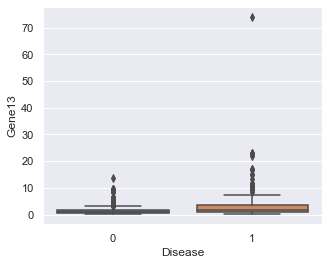

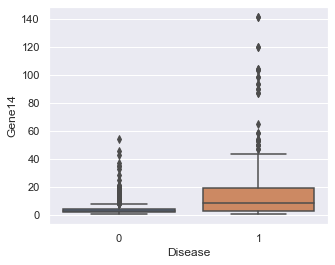

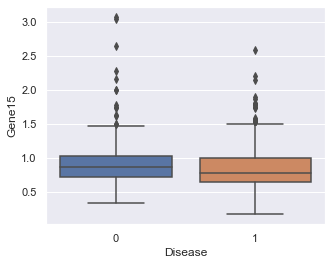

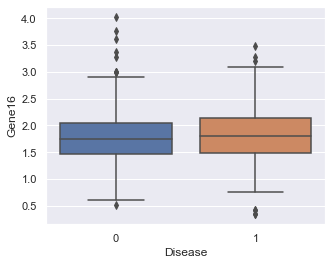

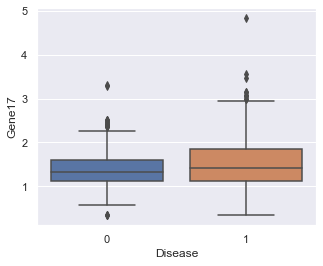

In [34]:
# Create Box plots for all columns

for column in df.columns[2:-1]:  
    sns.set()
    fig, ax = plt.subplots()
    sns.set(style="ticks")
    sns.boxplot(x='Disease', y=column, data=df)  
#     sns.despine(offset=10, trim=True) 
    fig.set_size_inches(5,4)
#     plt.savefig('{}.pdf'.format(column), bbox_inches='tight') 
    
    



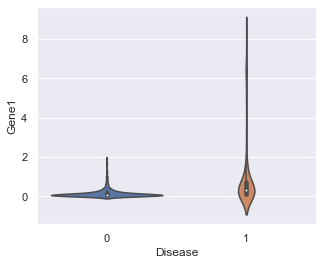

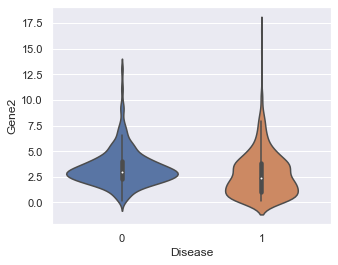

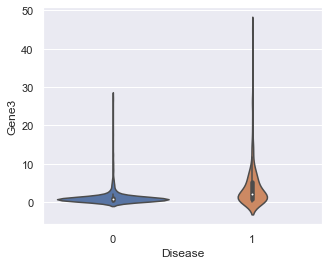

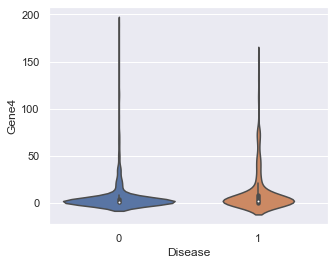

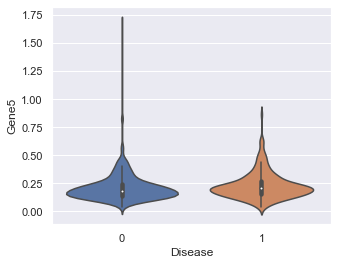

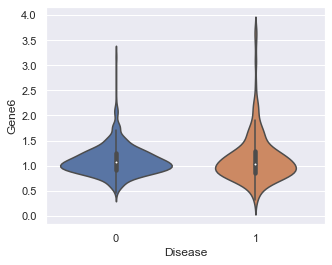

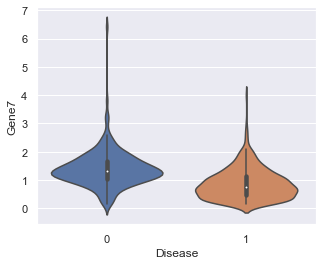

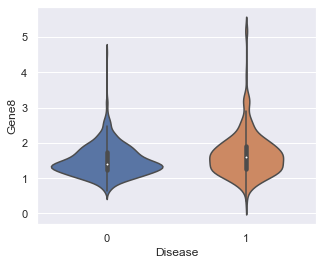

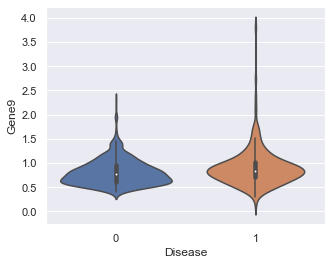

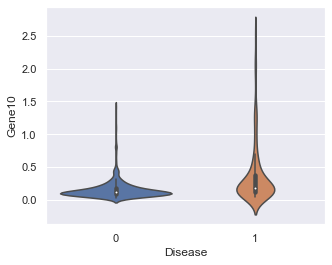

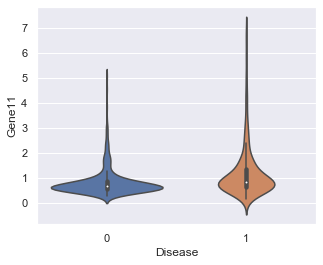

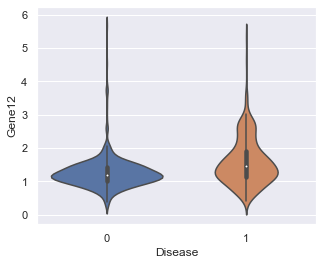

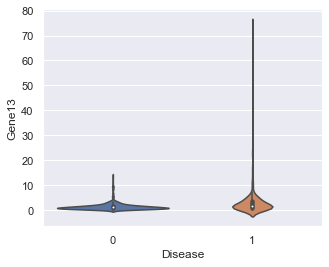

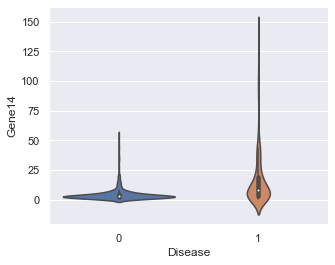

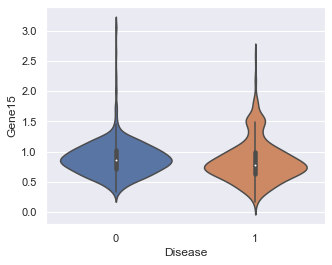

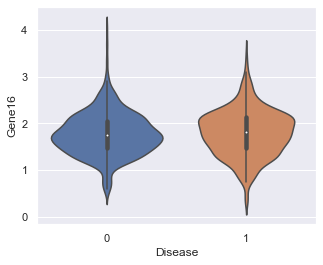

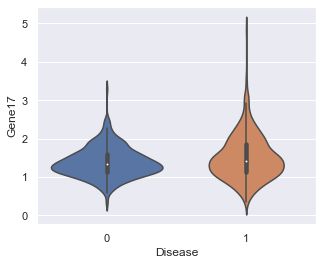

In [35]:
# Create Violin plots for all columns

for column in df.columns[2:-1]:  
    sns.set()
    fig, ax = plt.subplots()
    sns.set(style="ticks")
    sns.violinplot(x='Disease', y=column, data=df, size = 8)  
#     sns.despine(offset=10, trim=True) 
    fig.set_size_inches(5,4)
#     plt.savefig('{}.pdf'.format(column), bbox_inches='tight') 





In [36]:
# spliting the dataset into Train and Test
train_set,test_set=train_test_split(df, test_size=0.2)
#printing the data shape
print(train_set.shape)
print(test_set.shape)

(908, 20)
(227, 20)


In [37]:
#taking the main parameters in a single variable 
Top_10_Features = feat_importances.nlargest(10)
Top_10_Features

Gene1     0.101211
Gene7     0.092527
Gene10    0.076266
Gene3     0.075329
Gene12    0.071392
Gene15    0.069730
Gene13    0.057912
Gene4     0.052837
Gene2     0.049320
Gene11    0.049263
dtype: float64

In [38]:
x_train=train_set[Top_10_Features.index]
y_train=train_set.Disease

In [39]:
print(y_train.shape)
print(x_train.shape)

(908,)
(908, 10)


In [40]:
x_test=test_set[Top_10_Features.index]
y_test=test_set.Disease
print(y_test.shape)
print(x_test.shape)

(227,)
(227, 10)


In [41]:
# RandomForest Algorithm
#define the algorithm class into the algo_one variable
algo_one=RandomForestClassifier()
algo_one.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
#predicting the algorithm into the non trained dataset that is test set 
prediction = algo_one.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.8854625550660793

In [43]:
# SVM Algorithm
algo_two=svm.SVC()
algo_two.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [44]:
#predicting the algorithm into the non trained dataset that is test set 
prediction = algo_two.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.7929515418502202

In [45]:
# Decision Tree Algorithm
algo_three=DecisionTreeClassifier()
algo_three.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
#predicting the algorithm into the non trained dataset that is test set 
prediction = algo_three.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.8766519823788547

In [47]:
# KNN
algo_four=KNeighborsClassifier()
algo_four.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
#predicting the algorithm into the non trained dataset that is test set 
prediction = algo_four.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.7400881057268722

In [49]:
# GaussianNB
algo_five=GaussianNB()
algo_five.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
prediction = algo_five.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.7312775330396476

In [51]:
pred_var = Top_10_Features.index
#creating new variable
x_grid= df[pred_var]
y_grid= df["Disease"]

In [52]:
# lets Make a function for Grid Search CV
def Classification_model_gridsearchCV(model,param_grid,x_grid,y_grid):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    # this is how we use grid serch CV we are giving our model
    # the we gave parameters those we want to tune
    # Cv is for cross validation
    # scoring means to score the classifier
    
    clf.fit(x_train,y_train)
    print("The best parameter found on development set is :")
    # this will gie us our best parameter to use
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    # this is the best score that we can achieve using these parameters#
    print(clf.best_score_)

In [53]:
# you will understand these terms once you follow the link above
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
# here our gridasearchCV will take all combinations of these parameter and apply it to model 
# and then it will find the best parameter for model
model= RandomForestClassifier()
Classification_model_gridsearchCV(model,param_grid,x_grid,y_grid)

The best parameter found on development set is :
{'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3}
the bset estimator is 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
The best score is 
0.8645374449339207


In [54]:
import xgboost as xgb

In [55]:
regressor=xgb.XGBRegressor()
regressor.fit(x_train,y_train)

[10:32:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [56]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.7586923973570922


In [57]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5452050759735139


In [58]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

[10:32:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [59]:
score.mean()

0.32257123143067856

In [60]:
prediction=regressor.predict(x_test)

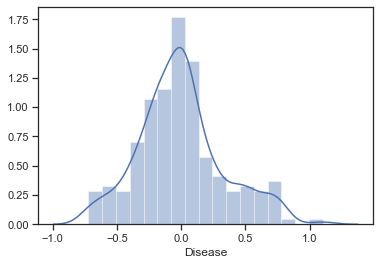

In [61]:
sns.distplot(y_test-prediction)

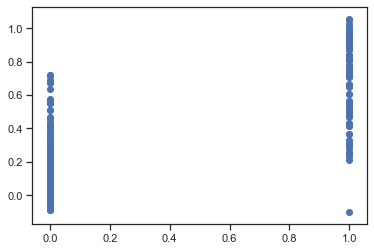

In [62]:
plt.scatter(y_test,prediction)

In [63]:
xgb.XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [66]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = [round(x,2) for x in np.linspace(start = 0.05, stop = 0.6, num = 6)]
# ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[int(x) for x in np.linspace(start = 3, stop = 7, num = 5)]
# [3,4,5,6,7]



In [68]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': [0.05, 0.16, 0.27, 0.38, 0.49, 0.6], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [69]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [70]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [71]:
xg_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.38 
[10:32:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.38, total=   1.4s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.38 
[10:32:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.38, total=   1.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.38 
[10:32:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.38, total=   2.1s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.38 
[10:32:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.38, total=   1.8s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.38 
[10:32:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/s

[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.38, total=   0.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.38 
[10:33:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.38, total=   1.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.38 
[10:33:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.38, total=   1.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.38 
[10:33:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objectiv

[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.27, total=   1.8s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.27 
[10:33:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.27, total=   1.7s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.27 
[10:33:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.27, total=   1.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.38 
[10:33:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.49, total=   2.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.49 
[10:34:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.49, total=   2.2s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.49 
[10:34:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.49, total=   2.2s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.49 
[10:34:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/s

[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.38, total=   0.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.38 
[10:35:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.38, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.49 
[10:35:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.49, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.49 
[10:35:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.16, total=   2.3s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.16 
[10:36:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.16, total=   2.3s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.16 
[10:36:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.16, total=   2.3s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.16 
[10:36:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.38, total=   2.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.16 
[10:36:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.16, total=   2.4s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.16 
[10:36:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.16, total=   2.5s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.16 
[10:36:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/ob

[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   1.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[10:37:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   1.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[10:37:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   1.3s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.16 
[10:37:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.38, total=   2.0s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.38 
[10:38:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.38, total=   1.9s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.38 
[10:38:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.38, total=   2.1s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.38 
[10:38:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.38, total=   1.7s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.38 
[10:38:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.38, total=   1.7s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[10:38:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   3.2s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[10:38:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   1.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[10:39:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   1.6s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[10:40:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   1.3s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[10:40:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective

[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.16, total=   2.9s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[10:41:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[10:41:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[10:41:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objectiv

[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.49, total=   0.6s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.49 
[10:41:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.49, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.49 
[10:41:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.49, total=   0.5s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.16 
[10:41:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.27, total=   1.7s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.27 
[10:42:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.27, total=   1.8s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.27 
[10:42:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.27, total=   1.9s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.27 
[10:42:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[10:43:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[10:43:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   1.7s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[10:43:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/re

[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   4.2s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[10:43:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   4.5s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[10:44:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   4.2s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[10:44:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.49, total=   1.4s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[10:44:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   1.3s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[10:44:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   1.4s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[10:44:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objectiv

[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[10:45:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[10:45:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[10:45:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obje

[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.16, total=   1.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.16 
[10:45:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.16, total=   1.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.16 
[10:45:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.16, total=   1.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.16 
[10:45:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.49, total=   1.1s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.49 
[10:46:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.49, total=   0.9s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.49 
[10:46:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.49, total=   1.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.49 
[10:46:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/object

[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.27, total=   1.0s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.27 
[10:47:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.27, total=   1.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.27 
[10:47:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.27, total=   0.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.27 
[10:47:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.27, total=   1.4s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.16 
[10:47:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.16, total=   3.2s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.16 
[10:47:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.16, total=   3.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.16 
[10:47:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/sr

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 15.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': [0.05, 0.16, 0.27, 0.38, 0.49, 0.6], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
       

In [72]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 800,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': 0.05}

In [73]:
xg_random.best_score_


-0.09406095208957878

In [74]:
xg_random.best_score_

-0.09406095208957878

In [75]:
predictions=xg_random.predict(x_test)

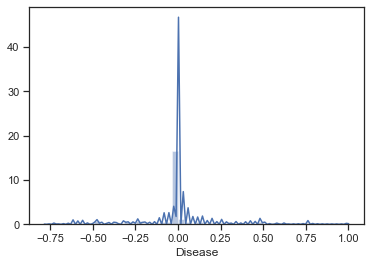

In [76]:
sns.distplot(y_test-predictions)

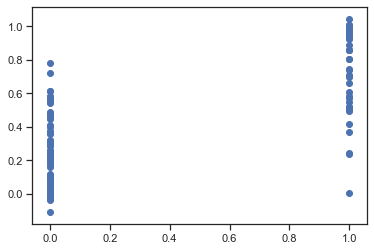

In [77]:
plt.scatter(y_test,predictions)

In [78]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.12136759697603235
MSE: 0.055714836799992395
RMSE: 0.23603990510079517


In [89]:
# Saving the XGBoost Model
import pickle 

file = open('XGBoost_model.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)